<a href="https://colab.research.google.com/github/KGzB/CAS-Applied-Data-Science/blob/master/Module-2/CAS-D3-Hypothesis-Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing not-normal symetric distribution

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy import stats

Our data contain of mean annual temperature of lake water in the the region of Eiffel maar (Germany) in the last 60,000 years.

In [129]:
df = pd.read_csv("Auel_ELSA_stack_GDGT.csv", sep=",")
df.dropna(inplace=True)
df.head()

,age_calBP,Age [ka b2k],Temp1,Temp2,Temp3,Temp4
0,46.15,46.2,6.26,6.92,9.02,8.62
1,142.75,142.8,5.10,6.49,7.71,8.08
2,174.95,175.0,4.90,6.38,7.81,8.19
3,239.35,239.4,5.17,6.58,8.10,8.41
4,303.75,303.8,6.03,7.31,8.77,9.00


We plot the temperature data on the age scale

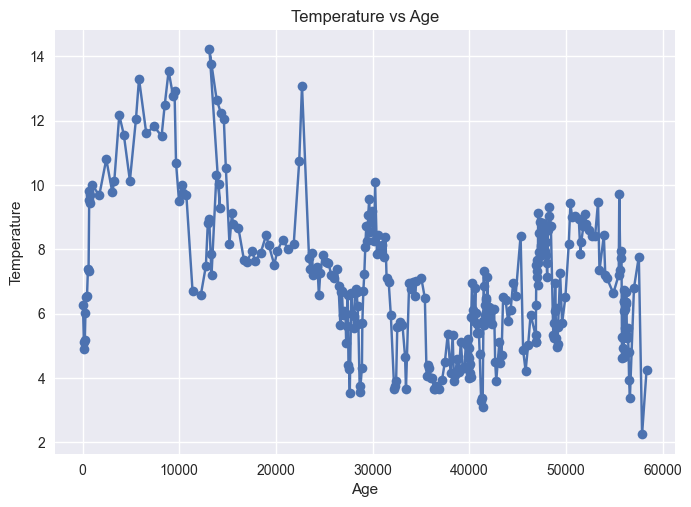

In [123]:
plt.plot(df['age_calBP'], df['Temp1'], marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Temperature')
plt.title('Temperature vs Age')
plt.show()

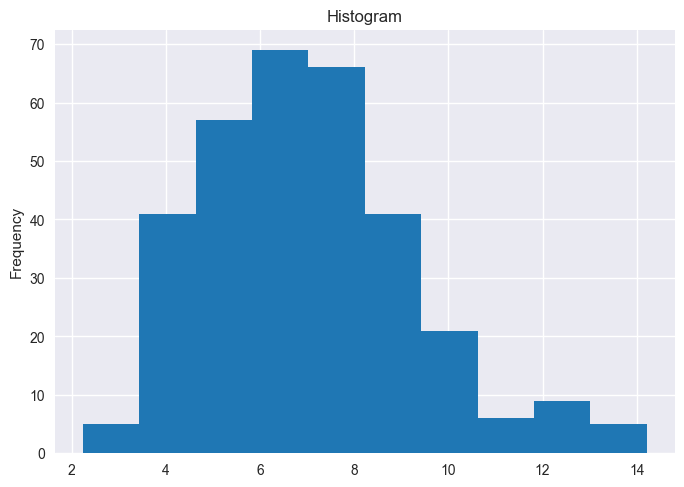

In [125]:
df['Temp1'].plot(kind="hist",fill=True,histtype='barstacked',title='Histogram', color= 'tab:blue')
plt.show()

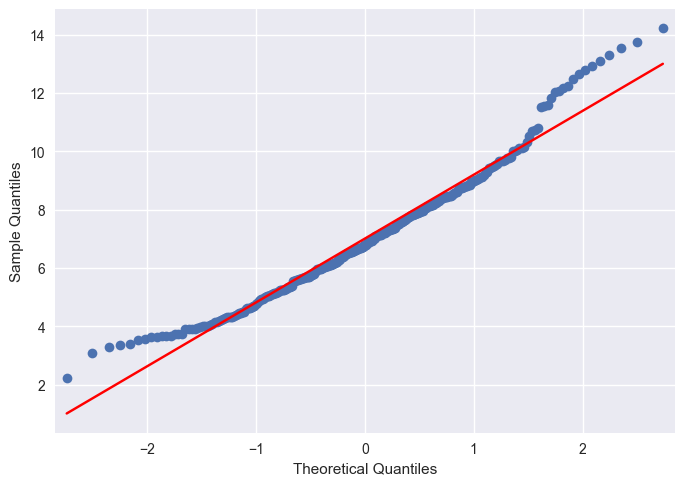

In [126]:
fig=sm.qqplot(df['Temp1'], line='s')
plt.show()

To guess the mean tempretaure which we need for the 1-sample Wilcoxon signed-rank test - testing symetric non-normal distribution, we calculate the descriptive statistics.

In [127]:
print(f' Skewness {df['Temp1'].skew()} ')
print(f' Kurtosis {df['Temp1'].kurtosis()} ')
print(f' Mean {df['Temp1'].mean()} ')
print(f' Median {df['Temp1'].median()} ')

 Skewness 0.6851019251202788 
 Kurtosis 0.5316243501018669 
 Mean 7.00409375 
 Median 6.775 


First we test whether the data are normally distributed with the Agostino-Pearson test.

H0: The mean lake temperature in the last 60000 years is >= 6.775°C.

H1: The mean lake temperature in the last 60000 years is < 6.775°C.

In [134]:
k2, p = stats.normaltest(df['Temp1']) # D Agostino-Pearson. The method returns the test statistic value and the p-value
alpha = 0.05 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected")
else:
  print("The null hypothesis cannot be rejected")

Alpha =  0.05
p =  4.308957900771785e-06
The null hypothesis can be rejected


Based on the test, the null hypotheses of the data being normaly distributed can be rejected. Thus, we try to find what kind of distribution the data are. 

Now we test whether the data are symetric non-normally distributed, using the guessed median of 6.775°C.

H0: The mean lake temperature in the last 60000 years is >= 6.775°C.

H1: The mean lake temperature in the last 60000 years is < 6.775°C.

In [132]:
k2, p = stats.wilcoxon(df['Temp1']- 6.775, alternative='two-sided')
alpha = 0.05 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a non-normal symmetric distribution
     print("The null hypothesis can be rejected")
else:
  print("The null hypothesis cannot be rejected")

Alpha =  0.05
p =  0.41642782278276536
The null hypothesis cannot be rejected


Based on the test results, we cannot reject that the mean lake water temeprature is >= 6.775°C in the last 60000 years.